# KSL FASTAI IMPLEMENTATION


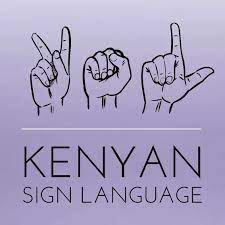



FastAI is a framework that aims at making deep learning accessible to all. Simply put, it simplifies, or unifies, deep learning neural nets.

For this particular notebook, I used data sourced from [Zindi Africa's Task Mate Kenyan Sign Language Classification Challenge](https://zindi.africa/competitions/kenyan-sign-language-classification-challenge/data) in which I was a participant. 
<br>

# Overview
The downloaded dataset contains:
* `train.csv` which has the image paths and labels
* `test.csv` which has several image paths but no labels
* `images.zip` containing the images to be used in this notebook
* `SampleSubmission.csv` that houses your predictions


# Aim

To be able to accurately classify images of individuals showcasing Kenya Sign Language and also being able to predict to which of the nine classes the images belong. Let's dive right into it!

# Mounting my drive

I downloaded the `images.zip` file and it being too large, I decided to upload it to my drive for easier access hence the mounted drive.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the necessary libraries

In [26]:

import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil #this helps in file manipulaation
import os # this will help in manipulating directories in ouur os
import pandas as pd
import tensorflow as tf
from collections import Counter


#installing both fastai and fastbook
!pip install fastai
!pip install fastbook

from fastai.vision.all import * # a GUI of some sort that helps in visualizing our data while training it.
from fastbook import * # a collecion of notebooks created by the Fast AI team 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Viewing samples of the images

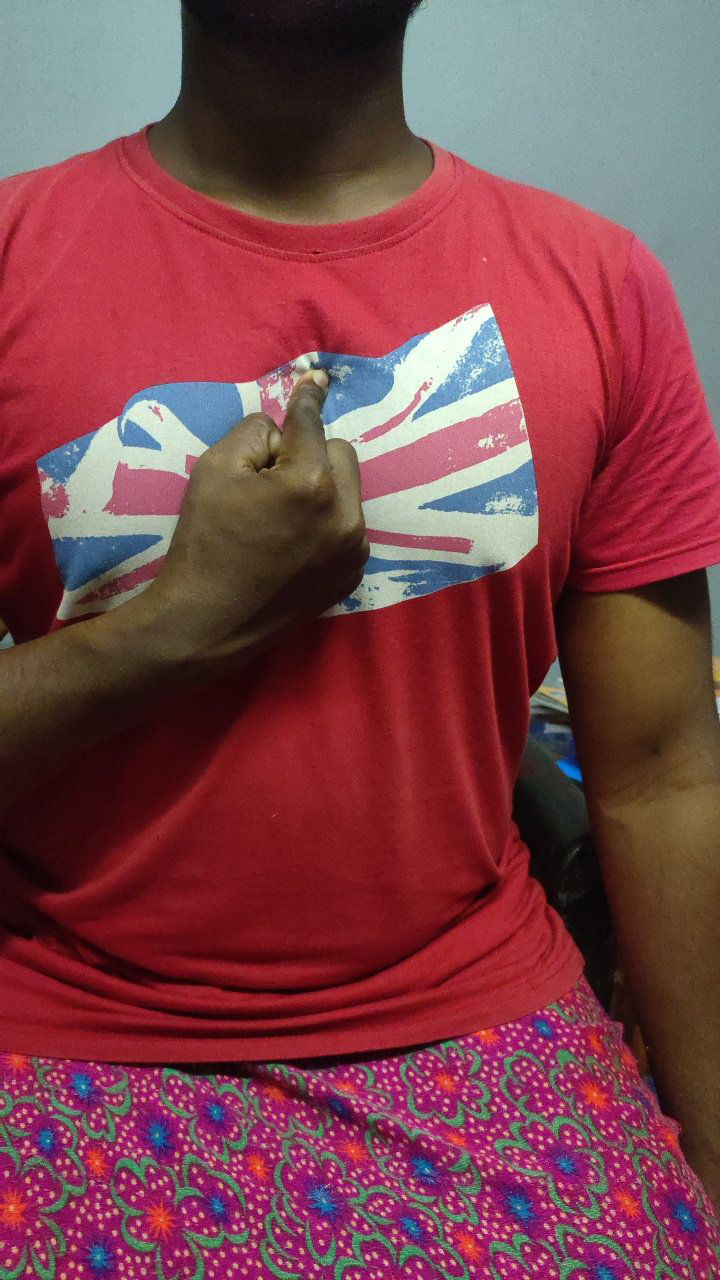

In [3]:
sample_data = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Images/Images/ImageID_06L75BYI.jpg')
sample_data

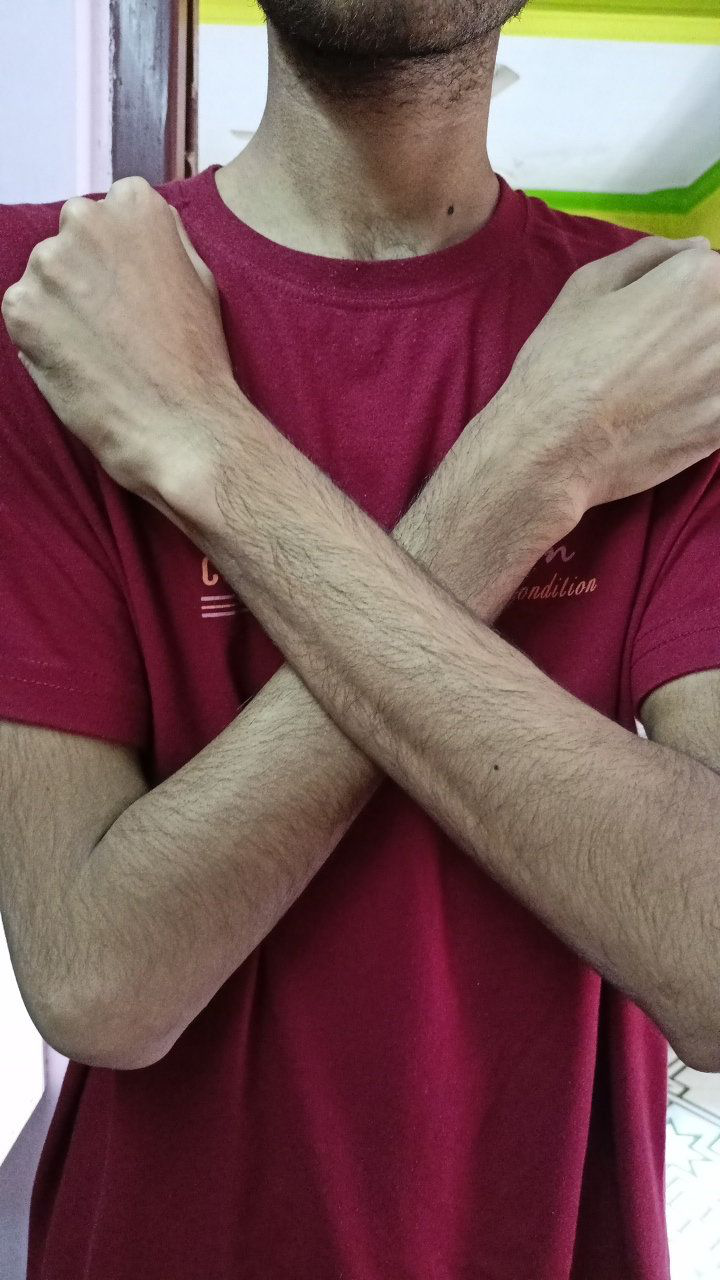

In [4]:
sample_data = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Images/Images/ImageID_0FHJXYTK.jpg')
sample_data

# Loading data from the `Train.csv` file

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv')
df.head()

img_IDS             Label
0  ImageID_33HMDMJ3            Temple
1  ImageID_V5POEX4O            Church
2  ImageID_89CCCCW6  Enough/Satisfied
3  ImageID_GNJXOWX5                Me
4  ImageID_7Q9LOP7R              Love

In [6]:
# Checking to see that all training data have labels
df.isnull().sum()

img_IDS    0
Label      0
dtype: int64

In [7]:
# Determining the unique labels
df['Label'].unique()

array(['Temple', 'Church', 'Enough/Satisfied', 'Me', 'Love', 'Mosque', 'You', 'Friend', 'Seat'], dtype=object)

Having determined that tere are no missing values, we have looked at the unique labels. We conclude that there are nine classes: `Temple`, `Church`, `Enough/Satisfied`, `Me`, `Love`, `Mosque`, `You`, `Friend`, `Seat`.

In [8]:
# replace 'Enough/Satisfied' with 'Enough' 
df['Label'] = df['Label'].str.replace('Enough/Satisfied', 'Enough')



In [9]:
# Viewing the updated labels
df['Label'].unique()

array(['Temple', 'Church', 'Enough', 'Me', 'Love', 'Mosque', 'You', 'Friend', 'Seat'], dtype=object)

In [10]:
# Using glob to iterate through a the image ids
images=glob.glob('/content/drive/MyDrive/Images/Images/ImageID_*.jpg')

In [11]:
print(len(images))

8929


In [12]:
# adding '.jpg' to each element in the 'ImageID' column for easier access
df['img_IDS'] = df['img_IDS'].str.rstrip() + '.jpg'

df.head()

img_IDS   Label
0  ImageID_33HMDMJ3.jpg  Temple
1  ImageID_V5POEX4O.jpg  Church
2  ImageID_89CCCCW6.jpg  Enough
3  ImageID_GNJXOWX5.jpg      Me
4  ImageID_7Q9LOP7R.jpg    Love

# Creating the images' classes

In [15]:
# Assigning our unique labels to the classnames variable
class_names = list(df['Label'].unique())

In [16]:
# Creating a directory for each unique label.
for i in class_names:
    os.makedirs(os.path.join('train_',i))

In [18]:
for i in class_names:                # I ->  class label names
  for c in list(df[df['Label']== i]['img_IDS']):    # c  ->  individual image 
  # Creating path to the image and storing it in get_image
      get_image = os.path.join('/content/drive/MyDrive/Images/Images',c)
      if not os.path.exists('train_/'+c+i):
          # move the image to this path
          shutil.copy(get_image,'/content/train_/'+i)


In [19]:
# Viewing the images creted under the church folder
os.listdir('/content/train_/Church')

['ImageID_2455Q6GU.jpg',
 'ImageID_AS4UGS0S.jpg',
 'ImageID_EE1RQ1UB.jpg',
 'ImageID_48TWXYMG.jpg',
 'ImageID_JVL615KW.jpg',
 'ImageID_JNTLGLYY.jpg',
 'ImageID_5VV8MLLX.jpg',
 'ImageID_IM2FE79I.jpg',
 'ImageID_0D69ZQ4X.jpg',
 'ImageID_LM4TFIRE.jpg',
 'ImageID_T6FKIIK6.jpg',
 'ImageID_ECB3B12X.jpg',
 'ImageID_T5ZAJIDS.jpg',
 'ImageID_DDFS052U.jpg',
 'ImageID_L36HQAVF.jpg',
 'ImageID_B4TS3Y3N.jpg',
 'ImageID_9DEO9CVM.jpg',
 'ImageID_5AIBEKUV.jpg',
 'ImageID_KT4UMIFX.jpg',
 'ImageID_1IT5E42N.jpg',
 'ImageID_ENCFMQBQ.jpg',
 'ImageID_8SU99B6H.jpg',
 'ImageID_Y5SI8U2F.jpg',
 'ImageID_ZDA5HCPA.jpg',
 'ImageID_NKTRTGB7.jpg',
 'ImageID_WK885JRM.jpg',
 'ImageID_JFF9YZNP.jpg',
 'ImageID_B4SK19FB.jpg',
 'ImageID_GVJ888LE.jpg',
 'ImageID_F0AV6PF7.jpg',
 'ImageID_YLROSMX7.jpg',
 'ImageID_NLEDK9VS.jpg',
 'ImageID_0C7FSZ03.jpg',
 'ImageID_D7X8I1DM.jpg',
 'ImageID_SQA8Y4M0.jpg',
 'ImageID_NWWQLODU.jpg',
 'ImageID_Q29RJ77C.jpg',
 'ImageID_IZHT6OU0.jpg',
 'ImageID_0E4M6QK9.jpg',
 'ImageID_LCUNW7P8.jpg',


# Data manipulation

Here, we'll find the `DataBlock` and `data loaders`. The former allows for the assembling of data such that we are able to define just what we want done to our data. The data allows for preparation ofour data for loading into the machine learning model and factors such as the bach size are taken care of at this point

In [20]:
# defining the path to our training images
path = Path('/content/train_')

# creating a pipeline for data assembly using fast.ai DataBlock api
ksl = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed=42),
                get_y = parent_label,
                item_tfms = RandomResizedCrop(512, min_scale=0.5),
                batch_tfms = aug_transforms(mult=2)
               )
# loading in the data with a batch size of 16, using fast.ai dataloaders
dls = ksl.dataloaders(path, bs = 16)

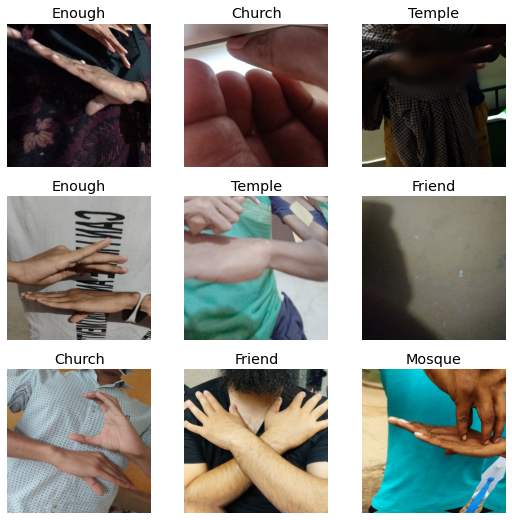

In [21]:
#Viewing the processed images in a batch
dls.show_batch()

# Visualizing the validation dataset
Here, we try to understand just how represented each class is in the validation data. The Counter() which is a subclass of dict stores our classes as keys and counts as values. Afterwards, we create a bar graph.

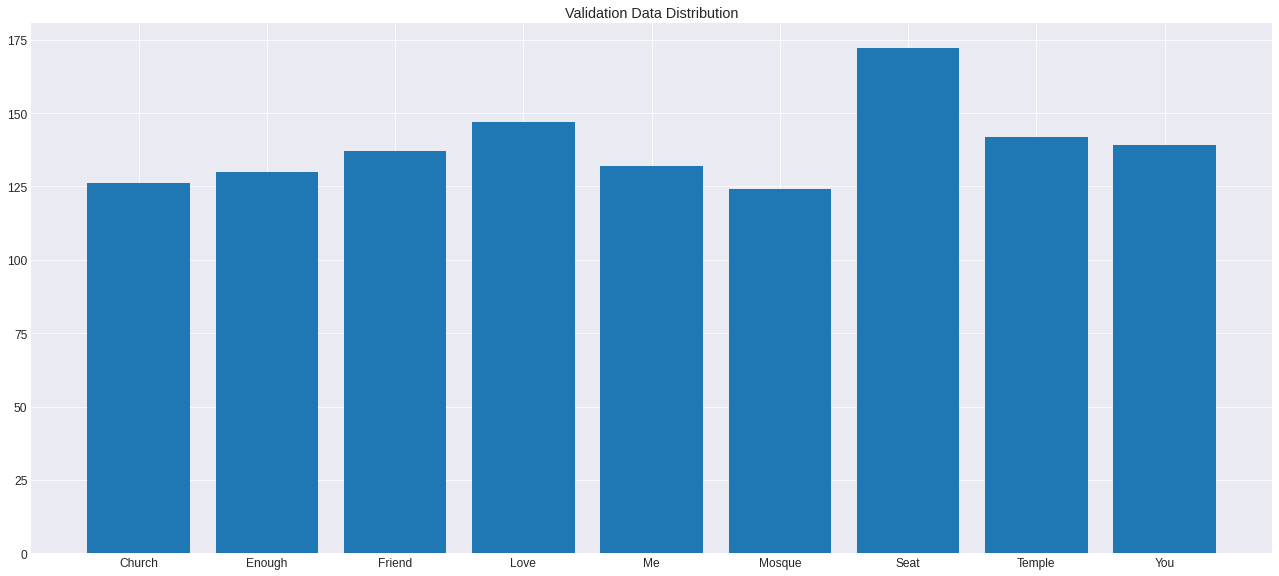

In [22]:

plt.style.use('seaborn-darkgrid')

def category_count(class_items, title):
  
  list_of_classes = [path.parts[-2] for path in class_items]
  d = dict(sorted(Counter(list_of_classes).items()))

  fig, ax = plt.subplots(figsize=(18,8))
  fig.tight_layout()

  plt.title(title)
  ax.bar(d.keys(), d.values())

category_count(dls.valid_ds.items, 'Validation Data Distribution')

# Model training

We build our cnn model in order to classify our images. In Fast AI, the model is called a learner. In this case, the cnn learner modelled on resnet34 is used. 

*resnet34 is a pre-trained on an images dataset. Since it has preset parameters, we take advantage of this and fine tune it to better fit it to our images.*

**Transfer learning** is achieved in this way

In [31]:
learn = cnn_learner(dls, resnet34, metrics=accuracy).to_fp16()

learn.fit_one_cycle(10)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


With 10 epochs, our validation loss stands at 0.28 which is good since we want our error to be as close to zero as possible. The accuracy is at 92 percent which is not bad.

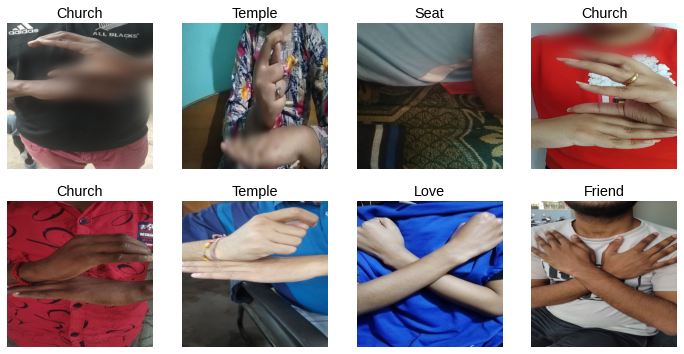

In [32]:
# Viewing the validation images (8 of them) for fun
dls.valid.show_batch(max_n=8, nrows=2)

# Exporting the model

In [33]:

# exporting the model
learn.export('/content/drive/MyDrive/Colab Notebooks/ksl_model.pkl')


# Loading the model

In [6]:
# to load the model for inference
learner_inf = load_learner('/content/drive/MyDrive/Colab Notebooks/ksl_model.pkl')

# Testing

In [34]:
test=pd.read_csv('/content/drive/MyDrive/Test.csv')

In [35]:
test.head()

img_IDS
0  ImageID_USRB8QNG
1  ImageID_SZ8D1ZJI
2  ImageID_4OJO2F8J
3  ImageID_IEE4XV0B
4  ImageID_BP0O0WZ9

In [36]:
# adding '.jpg' to each element in the 'ImageID' column for easier access
test['img_IDS'] = test['img_IDS'].str.rstrip() + '.jpg'

test.head()

img_IDS
0  ImageID_USRB8QNG.jpg
1  ImageID_SZ8D1ZJI.jpg
2  ImageID_4OJO2F8J.jpg
3  ImageID_IEE4XV0B.jpg
4  ImageID_BP0O0WZ9.jpg

In [ ]:
os.makedirs(os.path.join('test_',i))

In [58]:
class_names = set(test['img_IDS'].apply(lambda x: x.split('_')[0]))

for i in class_names: # I -> class label names
    for c in list(test['img_IDS']): # c  -> individual image 
        # Creating path to the image and storing it in get_image
        get_image = os.path.join('/content/drive/MyDrive/Images/Images', c)
        # Check if the image belongs to the test set
        if i in c:
            # If the image belongs to the test set, move it to the test_folder
            if not os.path.exists('test_/' + c):
                shutil.copy(get_image, '/content/test_/' + c)


In [62]:
 #loading the test dataset
test_dl = dls.test_dl(get_image_files_sorted('/content/test_/'))

# getting the predictions of our model
preds, _ = learner_inf.get_preds(dl=test_dl)

In [63]:
# Obtaining the index of the class our model believes the test image belongs to
y = torch.argmax(preds, dim=1)

# Makin use of use of the o2i methods to find the class associated with each index
cls_preds = list(map(lambda x: list(dls.vocab.o2i.keys())[list(dls.vocab.o2i.values()).index(x)], y))

# print our predictions of each test image
print(cls_preds)

['Temple', 'Church', 'Mosque', 'Mosque', 'Seat', 'Temple', 'Seat', 'Church', 'You', 'Seat', 'Temple', 'Seat', 'Seat', 'Me', 'Love', 'Temple', 'Me', 'Mosque', 'You', 'Seat', 'Me', 'Church', 'Church', 'Friend', 'Seat', 'Seat', 'Love', 'Church', 'Temple', 'You', 'Enough', 'Enough', 'Enough', 'Me', 'Love', 'Enough', 'Church', 'Church', 'Love', 'Me', 'Seat', 'Enough', 'Church', 'Friend', 'Temple', 'Enough', 'Me', 'Mosque', 'Temple', 'You', 'Seat', 'Me', 'Mosque', 'Temple', 'Me', 'Love', 'Mosque', 'Church', 'Enough', 'You', 'Me', 'Seat', 'Friend', 'Seat', 'Me', 'Church', 'Seat', 'Me', 'Enough', 'Seat', 'Friend', 'You', 'Temple', 'Friend', 'You', 'Me', 'Love', 'Enough', 'Enough', 'Temple', 'You', 'Enough', 'You', 'Enough', 'Me', 'Seat', 'Love', 'Temple', 'Love', 'Seat', 'Love', 'Temple', 'Seat', 'Love', 'You', 'Enough', 'Temple', 'Seat', 'Friend', 'Friend', 'Love', 'Temple', 'Seat', 'Church', 'Temple', 'Seat', 'Love', 'Love', 'Mosque', 'Enough', 'Temple', 'Me', 'Me', 'You', 'You', 'Temple', '

We use o2i to find the class with the highest value of proability in the test dataset.

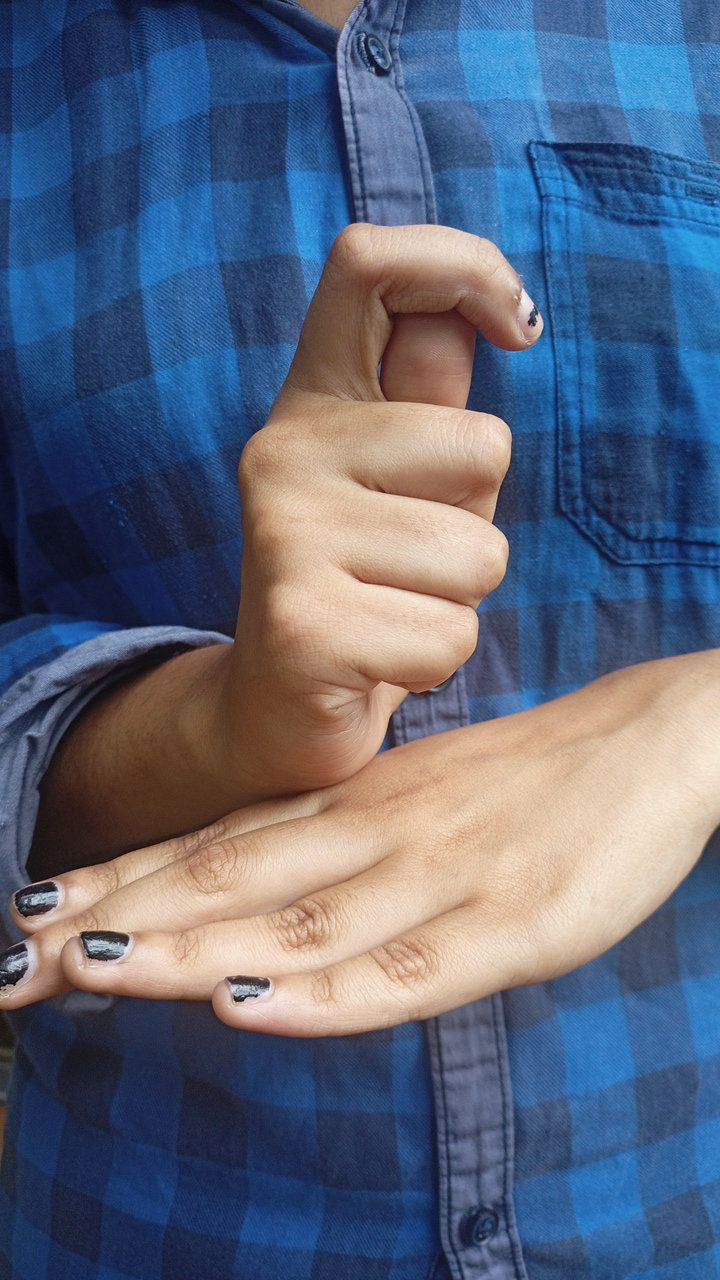

In [65]:
sample_test_data = tf.keras.preprocessing.image.load_img('/content/test_/ImageID_00AVE728.jpg')
sample_test_data

Viewing the first image in the test images, we get the above image. From the predictions, this image is labelled temple and by inspection, we can tell that that label is right. 

# Uploading image for testing

And finally, this project would not be complete without acreating an interface through which people can interact. I am experimenting with the code below but I am getting an attribute error. I am working on it and will upload the update. 

In [30]:
from PIL import Image
from IPython.display import display
import io
from ipywidgets import widgets

def upload_and_predict(learner_inf):
    # upload custom image using the 'Upload' widget
    w = widgets.FileUpload()
    display(w)
    
    # add a predict button
    btn = widgets.Button(description="Predict")
    display(btn)
    
    # define the predict function
    def predict(change):
        if w.data:
            # get the first (and only) image in the uploaded file list
            img = w.data[0]
            
            # open the image using PIL
            image = Image.open(io.BytesIO(img))
            # image.save(image, format='jpeg')
            # image=image.getvalue()
            
            # resize the image
            image = image.resize((512, 512))
            
            # display the image
            display(image)
            
            # make a prediction
            prediction = learner_inf.predict(image)# getting the predictions of our model


            # output the prediction
            print("Prediction:", prediction)
        else:
            print("No files uploaded.")
            
    # bind the predict function to the button's click event
    btn.on_click(predict)

# call the function
upload_and_predict(learner_inf)


FileUpload(value={}, description='Upload')

Button(description='Predict', style=ButtonStyle())